<a href="https://colab.research.google.com/github/djdumpling/Machine-Learning-Prince-/blob/main/8_2_Bias_Variance_Trade_Off_(Check_lin_alg_later).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def true_function(x):
  y = np.exp(np.sin(x*(2*3.1413)))
  return y

In [ ]:
def generate_data(n_data, sigma_y = 0.3):
  x = np.ones(n_data)
  for i in range(n_data):
    x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)

  y = np.ones(n_data)
  for i in range(n_data):
    y[i] = true_function(x[i])
    y[i] += np.random.normal(0, sigma_y, 1)

  return x,y

In [ ]:
def plot_function(x_func, y_func, x_data=None, y_data=None, x_model = None, y_model =None, sigma_func = None, sigma_model=None):

    fig,ax = plt.subplots()
    ax.plot(x_func, y_func, 'k-')
    if sigma_func is not None:
      ax.fill_between(x_func, y_func-2*sigma_func, y_func+2*sigma_func, color='lightgray')

    if x_data is not None:
        ax.plot(x_data, y_data, 'o', color='#d18362')

    if x_model is not None:
        ax.plot(x_model, y_model, '-', color='#7fe7de')

    if sigma_model is not None:
      ax.fill_between(x_model, y_model-2*sigma_model, y_model+2*sigma_model, color='lightgray')

    ax.set_xlim(0,1)
    ax.set_xlabel('Input,  x')
    ax.set_ylabel('Output, y')
    plt.show()

<ipython-input-3-387afc9ae668>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)
<ipython-input-3-387afc9ae668>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] += np.random.normal(0, sigma_y, 1)


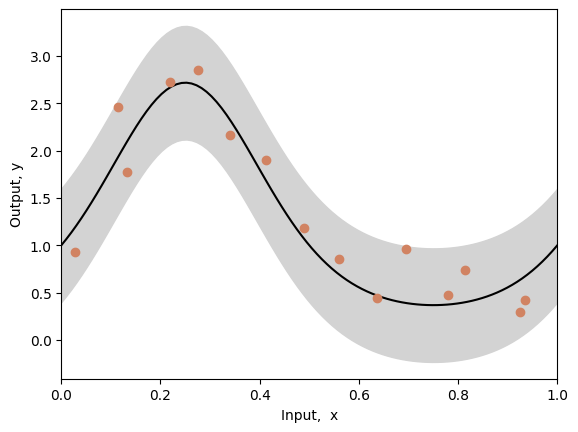

In [ ]:
x_func = np.linspace(0, 1.0, 100)
y_func = true_function(x_func)

np.random.seed(1)
sigma_func = 0.3
n_data = 15
x_data, y_data = generate_data(n_data, sigma_func)

plot_function(x_func, y_func, x_data, y_data, sigma_func = sigma_func)

In [ ]:
def network(x, beta, omega):
  # retrieve num(hidden units)
  n_hidden = omega.shape[0]

  y = np.zeros_like(x)
  for c_hidden in range(n_hidden):
    # eval activations based on shifted lines (see figure 8.4b-d)
    # spaced evenly from 0 to 1
    line_vals = x - c_hidden/n_hidden
    # like the relu
    h = line_vals * (line_vals > 0)
    # weight activations by omega parameters and sum
    y = y + omega[c_hidden] * h
  # bias, beta
  y = y + beta

  return y

In [ ]:
def fit_model_closed_form(x, y, n_hidden):
  # form the Original Colab:
  # This fits the n_hidden+1 parameters (see fig 8.4a) in closed form.
  # If you have studied linear algebra, then you will know it is a least
  # squares solution of the form (A^TA)^-1A^Tb.  If you don't recognize that,
  # then just take it on trust that this gives you the best possible solution.
  n_data = len(x)
  A = np.ones((n_data, n_hidden+1))
  for i in range(n_data):
    for j in range(1, n_hidden+1):
      A[i,j] = x[i]-(j-1)/n_hidden
      if A[i,j] < 0:
        A[i,j] = 0

  beta_omega = np.linalg.lstsq(A, y, rcond = None)[0]

  beta = beta_omega[0]
  omega = beta_omega[1:]

  return beta, omega

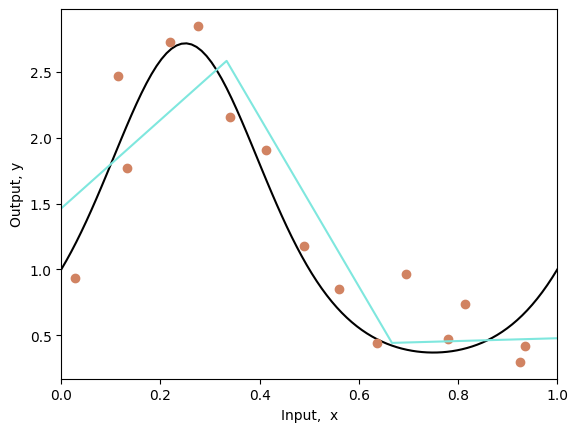

In [ ]:
# closed form solution
beta, omega = fit_model_closed_form(x_data, y_data, n_hidden = 3)

#prediction for model across graph range
x_model = np.linspace(0,1,100)
y_model = network(x_model, beta, omega)

plot_function(x_func, y_func, x_data, y_data, x_model, y_model)

In [ ]:
def get_model_mean_variance(n_data, n_datasets, n_hidden, sigma_func):

  # Create array storing model results in rows
  y_model_all = np.zeros((n_datasets, x_model.shape[0]))

  for c_dataset in range(n_datasets):
    # generating n_Data (x,y) pairs with standard deviation sigma_func
    x_data, y_data = generate_data(n_data, sigma_func)
    # fitting the model
    beta, omega = fit_model_closed_form(x_data, y_data, n_hidden)
    # running the fitted model on x_model
    y_model = network(x_model, beta, omega)
    # store model results
    y_model_all[c_dataset, :] = y_model

  mean_model = np.mean(y_model_all, axis = 0)
  std_model = np.std(y_model_all, axis = 0)

  return mean_model, std_model

<ipython-input-3-387afc9ae668>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)
<ipython-input-3-387afc9ae668>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] += np.random.normal(0, sigma_y, 1)


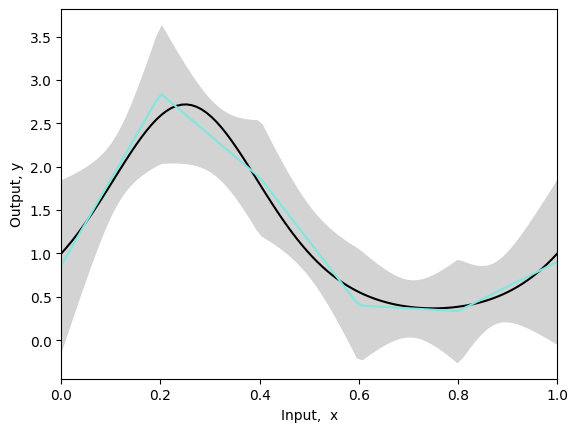

In [ ]:
n_datasets = 100
# increasing sigma_func changes black function while decreasing std dev of gray region
n_data = 10
# increasing sigma_func increase standard dev
sigma_func = 0.3
# increasing n_hidden improves the blue lines modelling to the true function
n_hidden = 5

np.random.seed(1)
mean_model, std_model = get_model_mean_variance(n_data, n_datasets, n_hidden, sigma_func)

plot_function(x_func, y_func, x_model = x_model, y_model = mean_model, sigma_model = std_model )

<ipython-input-3-387afc9ae668>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)
<ipython-input-3-387afc9ae668>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] += np.random.normal(0, sigma_y, 1)


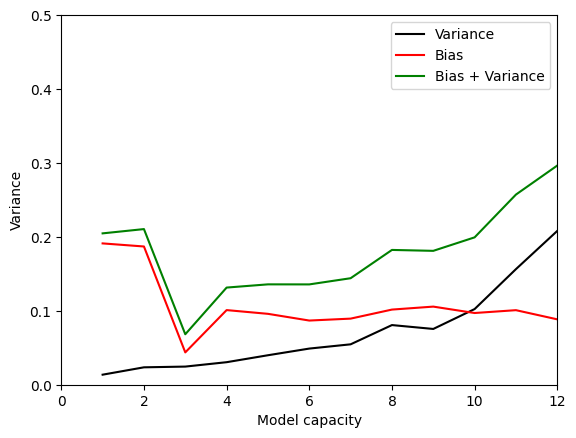

In [ ]:
hidden_variables = [1,2,3,4,5,6,7,8,9,10,11,12]
bias = np.zeros((len(hidden_variables), 1))
variance = np.zeros((len(hidden_variables), 1))

n_datasets = 100
n_data = 15
sigma_func = 0.3
n_hidden = 5

np.random.seed(1)

for c_hidden in range(len(hidden_variables)):
  mean_model, std_model = get_model_mean_variance(n_data, n_datasets, hidden_variables[c_hidden],  sigma_func)

  # variance: average squared deviation of fitted models around mean fitted model
  variance[c_hidden] = np.mean(std_model ** 2)
  # average squared deviation of mean fitted model around true function
  bias[c_hidden] = np.mean((mean_model - y_model) ** 2)

fig,ax = plt.subplots()
ax.plot(hidden_variables, variance, 'k-')
ax.plot(hidden_variables, bias, 'r-')
ax.plot(hidden_variables, variance+bias, 'g-')
ax.set_xlim(0,12)
ax.set_ylim(0,0.5)
ax.set_xlabel("Model capacity")
ax.set_ylabel("Variance")
ax.legend(['Variance', 'Bias', 'Bias + Variance'])
plt.show()